## Importations

In [10]:
import numpy as np
import math as m
import scipy.constants as constants
import scipy.special as specials
import matplotlib.pyplot as plt
%matplotlib notebook

# Kuiper's belt gravitational field $\vec{K}(\vec{r})$ under Newton's potential

In [90]:
def Kuiper_Newton(x, y, z, 
                  mu = 1.97 * 3986004418 * 10**3, ecliptic_plane_angle_x = (23.4 + 1.86) * 2 * m.pi / 360,
                  R_center = 45 * constants.au, R0 = 16 * constants.au):
    """ The position of the mass is expressed in cartesian coordinates in the solar system's reference frame"""
    xp = x
    yp = y * m.cos(ecliptic_plane_angle_x) + z * m.sin(ecliptic_plane_angle_x)
    zp = -y * m.sin(ecliptic_plane_angle_x) + z * m.cos(ecliptic_plane_angle_x)
    rpp = m.sqrt(yp**2 + xp**2)
    if yp >= 0:
        thetapp = m.acos(xp / rpp)
    else :
        thetapp = - m.acos(xp / rpp)
    zpp = zp
    
    r0 = R0 / R_center
    rho = rpp / R_center
    xi = zpp / R_center
    M = (4  * rho) / ((rho + 1)**2 + xi**2)
    
    K = specials.ellipk(M)
    E = specials.ellipe(M)
    Kp = (E - (1 - M**2) * K) / (M * (1 - M**2)) # differential equation on the elliptic integrals
    Ep = (E - K) / M # differential equation on the elliptic integrals
    dm_drho = 4 / ((rho + 1)**2 + xi**2) - 8 * rho * (rho + 1) / ((rho + 1)**2 + xi**2)**2
    dm_dz = - 8 * rho * xi / ((rho + 1)**2 + xi**2)**2
    
    potentiel = 1 / (m.pi )* m.sqrt(M / rho) * K * (1 - r0**2 / 16 - r0**2 / 16 * (rho**2 + xi**2 - 1)/((rho + 1)**2 + xi**2) * E / K)
    
    Krpp =  mu / (m.pi * R_center**2) * (1 - r0**2 / 16) * (- 2 * (rho + 1) * (M / (4 * rho))**(3/2) * K + m.sqrt(M / rho) * dm_drho * Kp)
    Krpp += mu / (m.pi * R_center**2) * (r0**2/ 16) * ((- 6 * (rho + 1) * (rho**2 + xi**2 - 1) / ((rho + 1)**2 + xi**2)**(5/2) + 4 * rho / ((rho + 1)**2 + xi**2)**(3/2)) * E + m.sqrt(M / rho) * (rho**2 + xi**2 - 1) / ((rho + 1)**2 + xi**2) * dm_drho * Ep)
    Kzpp =  mu / (m.pi * R_center**2) * (1 - r0**2 / 16) * (- 2 * xi / ((rho + 1)**2 + xi**2)**(3/2) * K + m.sqrt(M / rho) * dm_dz * Kp)
    Kzpp += mu / (m.pi * R_center**2) * (r0**2/ 16) * ((- 6 * xi * (rho**2 + xi**2 - 1) / ((rho + 1)**2 + xi**2)**(5/2) + 4 * xi / ((rho + 1)**2 + xi**2)**(3/2)) * E + m.sqrt(M / rho) * (rho**2 + xi**2 - 1) / ((rho + 1)**2 + xi**2) * dm_dz * Ep)
    Ktethapp = 0
    
    Kx = m.cos(thetapp) * Krpp
    Ky = m.sin(thetapp) * m.cos(ecliptic_plane_angle_x) * Krpp - m.sin(ecliptic_plane_angle_x) * Kzpp
    Kz = m.sin(thetapp) * m.sin(ecliptic_plane_angle_x) * Krpp + m.cos(ecliptic_plane_angle_x) * Kzpp
    
    return(potentiel, Kx, Ky, Kz)

<IPython.core.display.Javascript object>


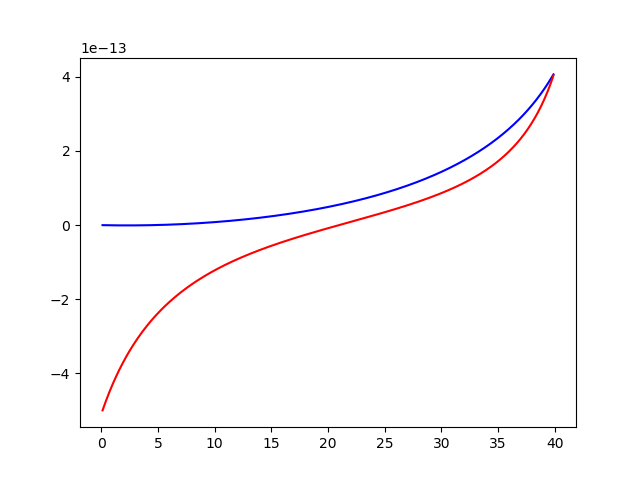

In [99]:
plt.figure(1)
X, Y, Z = [], [], []
for i in range(1, 400):
    X.append(i/10)
    potentiel, fx, fy, fz = Kuiper_Newton(i/10 * constants.au, 0, 0)
    Y.append(fx)
    Z.append((potentiel - 1) * 10**(-12))
plt.plot(X, Z, 'b')
plt.plot(X, Y, 'r')
plt.show()

Ca compile, mais il reste un petit résidu de force que l'on ne comprend pas trop (répulsive puis attractive pour une masse test à l'intérieur de l'anneau). Notons que les valeurs de ces forces sont négligeables. 

Clairement la valeur strictement positive en 0 n'est pas acceptable. 

La dérivée $K'(m=0)$ est strictement négative, c'est une erreur numérique...

Le potentiel ne semble pas tendre vers 1 pour un rayon nul.

La forme du potentiel est la bonne néanmoins.

Le potentiel semble avoir une dérivée négative en 0...

Le potentiel est plutot croissant dans le cadres des rayons considérés. Donc l'équation à utiliser est $\vec{F} = + \vec{\nabla}\phi$ et la force devrai être toujours attractive sauf proche de 0 où le potentiel se comporte bizarrement.

Néanmoins il y a un problème de dérivation visiblement...

# Kuiper's belt gravitational field $\vec{K}(\vec{r})$ under Yukawa's potential